In [113]:
import numpy as np
import commands

In [114]:
import sys # needed to import cat_utils
sys.path.insert(0, '/Users/abrahamn/21cmIR/21cmIRxcor/')

In [115]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [116]:
import imp
import cat_utils
imp.reload(cat_utils)

<module 'cat_utils' from '/Users/abrahamn/21cmIR/21cmIRxcor/cat_utils.pyc'>

In [117]:
# LOAD MWA CATALOG

mwa_cat = cat_utils.MWACatalog('mwa_calibration_source_list.sav')

In [6]:
# # LOAD IR CATALOGS OVER 10deg FOV centered at (RA,Dec)=(0,-27deg)

# raw_frames_path = '/Volumes/abraham/xcor_data/ATLAS_mwa57694_rereduction/'
# analysis_root = '/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57694_rereduction/'
# labels = '02a57694o0326I 02a57694o0368I 02a57694o0323I 02a57694o0365I'.split()
# ir_cats_dph = [cat_utils.IRCatalog(raw_frames_path+l+'.dph',\
#                              fits_path=analysis_root+'/'+l+'/'+l+'_5degframecentered.fits') for l in labels]
# ir_cats_se = [cat_utils.IRCatalog(se_path=analysis_root+'field'+str(i)+'/field'+str(i)+'.sex',\
#                              fits_path=analysis_root+'/field'+str(i)+'/field'+str(i)+'.fits') for i in range(4)]
# ir_cats = ir_cats_se

In [7]:
# plt.figure(figsize=(12,5))
# plt.subplot(121)
# plt.imshow(cat_utils.cat2img(ir_cats_dph[0],bound_cat=ir_cats_dph[0],dtheta=dtheta_deg,jymin=0,jymax=.01),interpolation='nearest',\
#           vmin=0,vmax=.1)

# plt.subplot(122)
# plt.imshow(cat_utils.cat2img(ir_cats_se[0],bound_cat=ir_cats_se[0],dtheta=dtheta_deg,jymin=0,jymax=.01),interpolation='nearest',\
#           vmin=.0,vmax=.1)

In [8]:
# plt.figure(figsize=(20,8))

# plt.subplot(121)
# cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4,exclude_artifacts=False)
# plt.ylim([-27,-21.5])
# plt.xlim([-6,0])
# plt.title('IR sources, all')

# plt.subplot(122)
# cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4,exclude_artifacts=True)
# plt.ylim([-27,-21.5])
# plt.xlim([-6,0])
# plt.title('IR sources, excluding artifacts ')

In [9]:
# plt.figure(figsize=(12,10))
# cat_utils.plot_cat_list(plt,ir_cats,[500]*4,['b']*4,jymin_vals=[.015]*4,alpha_vals=[.1]*4)
# plt.xlim([-8,8])
# plt.ylim([-34,-20])

In [10]:
# plt.figure(figsize=(16,12))
# mwa_cat_ir0 = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(ir_cats[1])
# cat_utils.plot_cat_list(plt,[ir_cats[1],mwa_cat_ir0],[500,60],['b','r'],jymin_vals=[.015,0],alpha_vals=[.1,.6])
# # plt.xlim([-8,8])
# # plt.ylim([-34,-20])

In [11]:
# matplotlib.rcParams.update({'font.size': 16})

# plt.figure(figsize=(30,4))
# plt.subplot(121)
# cat_utils.logloghist(plt,ir_cats[0].jy[ir_cats[0].jy<5],.00001,.2,30,'b')
# plt.xlim([.00001,.2])
# plt.title('IR sources')
# plt.xlabel('Jy')
# plt.ylabel('#')
# plt.yscale('log', nonposy='clip')

# plt.subplot(122)
# cat_utils.logloghist(plt,mwa_cat.jy[mwa_cat.jy<500],.001,500,30,'r')
# plt.xlim([.001,500])
# #plt.xlim([0,10])
# plt.title('MWA sources')
# plt.xlabel('Jy')
# plt.ylabel('#')
# plt.yscale('log', nonposy='clip')

In [54]:
# plt.figure(figsize=(14,6))

# plt.subplot(121)
# plt.imshow(ir_img,interpolation='nearest')
# plt.colorbar()

# plt.subplot(122)
# plt.imshow(mwa_img,interpolation='nearest')
# plt.colorbar()

In [12]:
nbins = 10
lmax = 3000
dtheta_deg = 5./60 # 5arcmin
num_ir_fields = 4

In [13]:
# ir_mwa_jymin_max_vals = [
# # [0,2.e-1,0,100],
# # [0,1.e-2,0,100],
# # [0,1.e-3,0,100],
# # [0,1.e-4,0,100],
# # [0,.5e-4,0,100],
# # [0,2.e-1,0,10],
# # [0,1.e-2,0,10],
# # [0,1.e-3,0,10],
# # [0,1.e-4,0,10],
# # [0,.5e-4,0,10],
# # [0,2.e-1,0,1],
# # [0,1.e-2,0,1],
# # [0,1.e-3,0,1],
# # [0,1.e-4,0,1],
# # [0,.5e-4,0,1],
# # [0,2.e-1,0,.1],
# # [0,1.e-2,0,.1],
# # [0,1.e-3,0,.1],
# # [0,1.e-4,0,.1],
# # [0,.5e-4,0,.1],
# [0,.05,0,1]
# ]

# imp.reload(cat_utils)
# for paramseti in range(len(ir_mwa_jymin_max_vals)):
#     print(ir_mwa_jymin_max_vals[paramseti])
#     ir_jymin,ir_jymax,mwa_jymin,mwa_jymax = ir_mwa_jymin_max_vals[paramseti]

#     pspec1 = np.zeros(nbins)
#     pspec2 = np.zeros(nbins)
#     xspec = np.zeros(nbins)
#     bin_counts = np.zeros(nbins)
#     for fieldi in range(num_ir_fields):
#         ir_img = cat_utils.cat2img(ir_cats[fieldi],bound_cat=ir_cats[fieldi],dtheta=dtheta_deg,jymin=ir_jymin,jymax=ir_jymax)
#         mwa_cat_ir0 = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(ir_cats[fieldi])
#         mwa_img = cat_utils.cat2img(mwa_cat_ir0,bound_cat=ir_cats[fieldi],dtheta=dtheta_deg,jymin=mwa_jymin,jymax=mwa_jymax)

#         lbins,pspec1_field,pspec2_field,xspec_field,bin_counts_field = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax)
#         pspec1 += pspec1_field/num_ir_fields
#         pspec2 += pspec2_field/num_ir_fields
#         xspec += xspec_field/num_ir_fields
#         bin_counts += bin_counts_field
        
#     cat_utils.plot_spectra(plt,lbins,pspec1,pspec2,xspec,bin_counts,ir_mwa_jymin_max_vals[paramseti])

# what about comparing MWA sources to far IR (akari) sources?

In [118]:
import pyfits
hdulist = pyfits.open('/Volumes/abraham/xcor_data/far_ir_catalogs/AKARI-FIS_BSC_V1.fits')
#hdulist = pyfits.open('/Users/abrahamn/Downloads/AKARI-FIS_BSC_V1.fits.txt')
he = hdulist[1].header
akaridat = hdulist[1].data
ra = akaridat['ra']
ra[ra>180] -= 360.
dec = akaridat['dec']
flux90 = akaridat['flux65']
mwamask = (ra > -10)&(ra < 10)&(dec > -37)&(dec < -17)&np.logical_not(np.isnan(flux90))

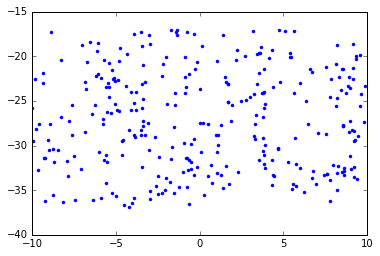

In [119]:
plt.plot(ra[mwamask],dec[mwamask],'.')

In [120]:
akaricat = cat_utils.Catalog(ra[mwamask],dec[mwamask],flux90[mwamask])
mwa_cat_akari = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(akaricat)

In [121]:
# cat_utils.logloghist(plt,mwa_cat_akari.jy,1.e-3,1.e2,50,'r')
# plt.xlabel('Jy')
# plt.ylabel('#')
# plt.title('Patti''MWA catalog histogram (mwa_calibration_source_list)\n limited to EOR0 field')

In [122]:
# nbins = 10
# lmax = 3000
# dtheta_deg = 5./60 # 5arcmin

In [20]:
# ir_img = cat_utils.cat2img(akaricat,bound_cat=akaricat,dtheta=dtheta_deg,jymin=0,jymax=1.e9)
# mwa_img = cat_utils.cat2img(mwa_cat_akari,bound_cat=akaricat,dtheta=dtheta_deg,jymin=0,jymax=1.e9)

# lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax)

# cat_utils.plot_spectra(plt,lbins,pspec1,pspec2,xspec,bin_counts,[0,0,0,0])

## what about comparing MWA sources to mid IR (WISE) sources?

In [35]:
# from astropy.table import Table

In [13]:
###t = Table.read('/Volumes/abraham/xcor_data/far_ir_catalogs/wise_allsky.allsky_4band_p3as_psd31177.tbl', format='ipac') # WISE
#t = Table.read('/Volumes/abraham/xcor_data/far_ir_catalogs/wise_allwise.wise_allwise_p3as_psd18333.tbl', format='ipac')  # ALLWISE

In [15]:
# ra = t['ra'].data.data
# ra[ra>180] -= 360
# dec = t['dec'].data.data
# w1_mag = t['w1mpro'].data.data
# w2_mag = t['w2mpro'].data.data
# w3_mag = t['w3mpro'].data.data
# w4_mag = t['w4mpro'].data.data

# # the mag uncertainty columns have a 'null' (which python reads as a 0) if the 
# # mag is actually a 95% upper limit (ie, if the source is not actually detected)
# w1_dmag = t['w1sigmpro'].data.data
# w2_dmag = t['w2sigmpro'].data.data
# w3_dmag = t['w3sigmpro'].data.data
# w4_dmag = t['w4sigmpro'].data.data

# g1 = (w1_dmag!=0)
# g2 = (w2_dmag!=0)
# g3 = (w3_dmag!=0)
# g4 = (w4_dmag!=0)
# gall = g1&g2&g3

In [16]:
# plt.figure(figsize=(30,20))
# plt.scatter(w2_mag[gall]-w3_mag[gall],w1_mag[gall]-w2_mag[gall],3,w1_mag[gall],alpha=1,edgecolor='none')
# plt.colorbar()
# plt.xlim([-1,6])
# plt.ylim([-1,2])
# plt.xlabel('w2-w3 (mag)')
# plt.ylabel('w1-w2 (mag)')
# plt.title('WISE color-color diagram (colorbar is w1 mag), cf. Fig. 12 in Wright+ 10')

In [17]:
# w1_jy = 309.54*10.**(-w1_mag/2.5) # these numbers are from http://wise2.ipac.caltech.edu/docs/release/allsky/expsup/sec4_4h.html#example
# w2_jy = 171.787*10.**(-w2_mag/2.5)
# w3_jy = 31.674*10.**(-w3_mag/2.5)
# w4_jy = 8.363*10.**(-w4_mag/2.5)

In [21]:
# wisecats = [cat_utils.Catalog(ra[g1],dec[g1],w1_jy[g1]),\
#            cat_utils.Catalog(ra[g2],dec[g2],w2_jy[g2]),\
#            cat_utils.Catalog(ra[g3],dec[g3],w3_jy[g3]),\
#            cat_utils.Catalog(ra[g4],dec[g4],w4_jy[g4])]

import cPickle as pickle
#pickle.dump(wisecats, open( "/volumes/abraham/xcor_data/far_ir_catalogs/wisecats.p", "wb" ) )
wisecats = pickle.load(open( "/volumes/abraham/xcor_data/far_ir_catalogs/wisecats.p",'rb'))

mwa_cat_wise = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(wisecats[0])

In [22]:
nbins = 10
lmax = 3000
dtheta_deg = 5./60 # 5arcmin

In [20]:
# # make flux limited wise images, and save to disk

# #jy_percentile_cuts = [[0,10],[10,90],[90,100]]
# jy_percentile_cuts = [[10,50]]
# for bandi in range(4):
#     for j in range(len(jy_percentile_cuts)):
#         print('bandi = %d, jypercentilecut = (%d,%d)'%(bandi,jy_percentile_cuts[j][0],jy_percentile_cuts[j][1]))
#         ir_img = cat_utils.cat2img(wisecats[bandi],bound_cat=wisecats[0],dtheta=dtheta_deg,\
#                                    jymin=np.percentile(wisecats[bandi].jy,jy_percentile_cuts[j][0]),\
#                                    jymax=np.percentile(wisecats[bandi].jy,jy_percentile_cuts[j][1]),verbose=True)
#         np.savez('/volumes/abraham/xcor_data/far_ir_catalogs/w'+str(bandi+1)+\
#                  '_jypercentilecut='+str(jy_percentile_cuts[j][0])+'_'+str(jy_percentile_cuts[j][1])+'.npz',ir_img)

In [21]:
# #mwa_percentile_limits = [15,90,100]
# mwa_percentile_limits = [90]
# cols = ['b']
# [np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[l])) for l in range(len(mwa_percentile_limits))]

In [22]:
# # load flux limited wise images, plot power spectra

# def make_fname(bandi,jypercentilecut):
#     return '/volumes/abraham/xcor_data/far_ir_catalogs/w'+str(bandi+1)+'_jypercentilecut='+str(jypercentilecut[0])+'_'+str(jypercentilecut[1])+'.npz'

# nbins = 10

# #plt.figure(1,figsize=(16,12))
# plt.figure(2,figsize=(16,12))
# matplotlib.rcParams.update({'font.size': 12})

# jy_percentile_cuts_combos = [[[0,10]],\
#                              [[0,10],[10,90]],
#                             [[0,10],[10,90],[90,100]]]


# for mwa_percentile_limiti in range(len(mwa_percentile_limits)):
    
#     mwa_img = cat_utils.cat2img(mwa_cat_wise,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=0,\
#                                 jymax=np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))
    
#     for bandi in range(4):
#         for j in range(len(jy_percentile_cuts_combos)):
            
#             ir_img = np.sum(np.array([np.load(make_fname(bandi,jypercentilecut))['arr_0'] for jypercentilecut in jy_percentile_cuts_combos[j]]),axis=0)
            
# #             plt.figure(1)
# #             plt.subplot(4,len(jy_percentile_cuts_combos),len(jy_percentile_cuts_combos)*bandi+j+1)
# #             plt.imshow(ir_img)
            
#             lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax,hann=True)
#             c = xspec/np.sqrt(pspec1*pspec2)

#             plt.figure(2)
#             plt.subplot(4,len(jy_percentile_cuts_combos),len(jy_percentile_cuts_combos)*bandi+j+1)
#             #plt.plot(lbins,c,cols[mwa_percentile_limiti]+'.-',label='MWA, < %d %%, %d sources'%(mwa_percentile_limits[mwa_percentile_limiti],\
#             #                                                  np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))))
            
#             l = 'MWA, < %d %%, %d sources'%(mwa_percentile_limits[mwa_percentile_limiti],\
#                                                               np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti])))
#             plt.errorbar(lbins,c,np.sqrt(.5*(1+c**2)/bin_counts),color=cols[mwa_percentile_limiti],label=l)
            
#             plt.xlim([0,np.max(lbins)])
#             plt.ylim([-.1,.4])
#             if bandi == 3: plt.xlabel('\ell')
#             if j == 0: plt.ylabel('correlation')
#             plt.title('W%d, < %s'%(bandi+1,str(jy_percentile_cuts_combos[j])))
#             plt.plot([0,5000],[0,0],'k-')
            
#             if bandi==0 and j==0 and mwa_percentile_limiti==2:
#                 plt.legend(fontsize=10)

# plt.tight_layout()
# plt.savefig('MWA_ALLWISE_xcor_array_allMWAsources.png',bbox_inches='tight')

In [23]:
# # load flux limited wise images, plot power spectra

# def make_fname(bandi,jypercentilecut):
#     return '/volumes/abraham/xcor_data/far_ir_catalogs/w'+str(bandi+1)+'_jypercentilecut='+str(jypercentilecut[0])+'_'+str(jypercentilecut[1])+'.npz'

# nbins = 10

# #plt.figure(1,figsize=(16,12))
# plt.figure(2,figsize=(16,12))
# matplotlib.rcParams.update({'font.size': 12})

# jy_percentile_cuts_combos = [[[0,10]],\
#                              [[0,10],[10,90]],
#                             [[0,10],[10,90],[90,100]]]

# for mwa_percentile_limiti in range(len(mwa_percentile_limits)):
    
#     mwa_img = cat_utils.cat2img(mwa_cat_wise,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=0,\
#                                 jymax=np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))
    
#     for bandi in range(4):
#         for j in range(len(jy_percentile_cuts_combos)):
            
#             ir_img = np.sum(np.array([np.load(make_fname(bandi,jypercentilecut))['arr_0'] for jypercentilecut in jy_percentile_cuts_combos[j]]),axis=0)
            
# #             plt.figure(1)
# #             plt.subplot(4,len(jy_percentile_cuts_combos),len(jy_percentile_cuts_combos)*bandi+j+1)
# #             plt.imshow(ir_img)
            
#             lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(ir_img,np.flipud(mwa_img),dtheta_deg,nbins,lmax,hann=True)
#             c = xspec/np.sqrt(pspec1*pspec2)

#             plt.figure(2)
#             plt.subplot(4,len(jy_percentile_cuts_combos),len(jy_percentile_cuts_combos)*bandi+j+1)
#             #plt.plot(lbins,c,cols[mwa_percentile_limiti]+'.-',label='MWA, < %d %%, %d sources'%(mwa_percentile_limits[mwa_percentile_limiti],\
#             #                                                  np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))))
            
#             l = 'MWA, < %d %%, %d sources'%(mwa_percentile_limits[mwa_percentile_limiti],\
#                                                               np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti])))
#             plt.errorbar(lbins,c,np.sqrt(.5*(1+c**2)/bin_counts),color=cols[mwa_percentile_limiti],label=l)
            
#             plt.xlim([0,np.max(lbins)])
#             plt.ylim([-.1,.4])
#             if bandi == 3: plt.xlabel('\ell')
#             if j == 0: plt.ylabel('correlation')
#             plt.title('W%d, < %s'%(bandi+1,str(jy_percentile_cuts_combos[j])))
#             plt.plot([0,5000],[0,0],'k-')
            
#             if bandi==0 and j==0 and mwa_percentile_limiti==2:
#                 plt.legend(fontsize=10)

# plt.tight_layout()
# plt.savefig('MWA_ALLWISE_xcor_array_allMWAsources_flipud.png',bbox_inches='tight')

In [24]:
# # plot flux limited MWA catalog images
# plt.figure(figsize=(16,4))
# for mwa_percentile_limiti in range(len(mwa_percentile_limits)):
#     mwa_img = cat_utils.cat2img(mwa_cat_wise,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=0,\
#                                 jymax=np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))
#     print('mwa jy < %1.2f'%np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))
#     plt.subplot(1,len(mwa_percentile_limits),mwa_percentile_limiti+1)
#     plt.imshow(mwa_img,interpolation='nearest')
#     plt.colorbar()

#     plt.title('MWA, < %d %%, %d sources'%(mwa_percentile_limits[mwa_percentile_limiti],\
#                                                           np.sum(mwa_cat_wise.jy<np.percentile(mwa_cat_wise.jy,mwa_percentile_limits[mwa_percentile_limiti]))))


## allwiseagn catalog

In [30]:
# wiseagnrawdat = open('/Volumes/abraham/xcor_data/far_ir_catalogs/J_ApJS_221_12/allwiseagn.dat').readlines()

In [31]:
# def line2dat(l):
#     x = l.split()
#     return [x[1],x[2],x[5]]
# wiseagndat = np.array([line2dat(l) for l in wiseagnrawdat],dtype=float)

In [36]:
# ra = wiseagndat[:,0]
# ra[ra>180] -= 360
# dec = wiseagndat[:,1]
# mag = wiseagndat[:,2]
# ineor0 = (ra> -8)&(ra<8)&(dec>-36)&(dec<-20)
# wiseagncat = cat_utils.Catalog(ra[ineor0],\
#                                dec[ineor0],\
#                                309.54*10.**(-mag[ineor0]/2.5)*1000 )

In [38]:
# nbins = 10
# lmax = 3000
# dtheta_deg = 5./60 # 5arcmin

# mwa_cat_wiseagn = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(wiseagncat)

In [30]:
# plt.hist(wiseagncat.jy[wiseagncat.jy<1],100)

In [31]:
# mwa_img = cat_utils.cat2img(mwa_cat_wiseagn,bound_cat=wiseagncat,dtheta=dtheta_deg,jymin=0,\
#                                 jymax=np.percentile(mwa_cat_wise.jy,90))

In [32]:
# ir_img = cat_utils.cat2img(wiseagncat,bound_cat=wiseagncat,dtheta=dtheta_deg,jymin=0,\
#                            jymax=np.percentile(wiseagncat.jy,70))

In [33]:
# plt.imshow(ir_img,interpolation='nearest')

In [34]:
# lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax,hann=True)
# c = xspec/np.sqrt(pspec1*pspec2)

# plt.plot(lbins,c,'.-')
# plt.ylim([-.4,.4])
# plt.plot([0,lmax],[0,0],'k-')

In [35]:
# cat_utils.plot_spectra(plt,lbins,pspec1,pspec2,xspec,bin_counts,[0,0,0,0])

In [123]:
# LOAD ATLAS_mwa57639 WHOLE FIELD CATALOG
secat = pickle.load( open('/Volumes/abraham/xcor_data/analysis/ATLAS_mwa57639/whole_field/whole_field_secat.p', "rb" ) )

(-15, -45)

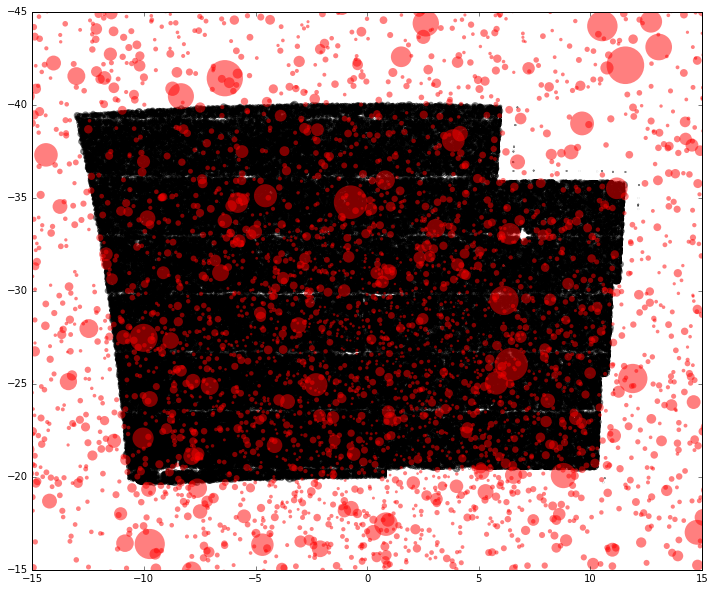

In [44]:
plt.figure(figsize=(12,10))
plt.scatter(secat.ra,secat.dec,150*secat.jy,alpha=.5,facecolors='none',edgecolors='k',linewidth=2)
plt.scatter(mwa_cat.ra,mwa_cat.dec,50*mwa_cat.jy,'r',alpha=.5,edgecolor='none')
plt.xlim([-15,15])
plt.ylim([-15,-45])

In [77]:
ir_jymin,ir_jymax = np.percentile(secat.jy,10),np.percentile(secat.jy,90)
racent,deccent = 0.,-28.
fov = 15.
dra,ddec = fov/np.cos(-27*np.pi/180.),fov
secat_fov = secat.limit_to_ra_dec_min_max(racent-dra/2,racent+dra/2,deccent-ddec/2,deccent+ddec/2)

ir_img = cat_utils.cat2img(secat,bound_cat=secat_fov,dtheta=5./60,jymin=ir_jymin,jymax=ir_jymax,verbose=True)

279247
0.0
0.111731843575
0.223463687151
0.335195530726
0.446927374302
0.558659217877
0.670391061453
0.782122905028
0.893854748603


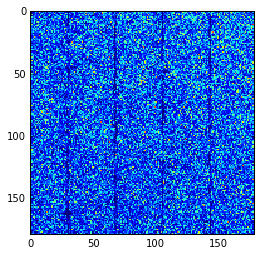

In [74]:
plt.imshow(ir_img,interpolation='nearest')

In [78]:
# make flux limited wise images, and save to disk

jy_percentile_cuts = [[0,10],[10,90],[90,100]]
for j in range(len(jy_percentile_cuts)):
    print('jypercentilecut = (%d,%d)'%(jy_percentile_cuts[j][0],jy_percentile_cuts[j][1]))
    ir_img = cat_utils.cat2img(secat_fov,bound_cat=secat_fov,dtheta=dtheta_deg,\
                               jymin=np.percentile(secat_fov.jy,jy_percentile_cuts[j][0]),\
                               jymax=np.percentile(secat_fov.jy,jy_percentile_cuts[j][1]),verbose=True)
    np.savez('/volumes/abraham/xcor_data/far_ir_catalogs/ATLAS_mwa57639_whole_field'+\
             '_jypercentilecut='+str(jy_percentile_cuts[j][0])+'_'+str(jy_percentile_cuts[j][1])+'.npz',ir_img)

jypercentilecut = (0,10)
0.0
0.111731843575
0.223463687151
0.335195530726
0.446927374302
0.558659217877
0.670391061453
0.782122905028
0.893854748603
jypercentilecut = (10,90)
0.0
0.111731843575
0.223463687151
0.335195530726
0.446927374302
0.558659217877
0.670391061453
0.782122905028
0.893854748603
jypercentilecut = (90,100)
0.0
0.111731843575
0.223463687151
0.335195530726
0.446927374302
0.558659217877
0.670391061453
0.782122905028
0.893854748603


# make paper plots

In [124]:
jy_percentile_cuts_combos = [[[0,10]],\
                             [[0,10],[10,90]],
                            [[0,10],[10,90],[90,100]]]

cats = [secat_fov,wisecats[0],mwa_cat_akari]
#cats = [fullsexcat,wisecats[0],mwa_cat_akari]
cat_names = ['ATLAS I band sources','WISE 3.6um sources','MWA 185MHz sources']

dtheta_deg = 5./60

def make_wise_img_fname(bandi,jypercentilecut):
    return '/volumes/abraham/xcor_data/far_ir_catalogs/w'+str(bandi+1)+'_jypercentilecut='+str(jypercentilecut[0])+'_'+str(jypercentilecut[1])+'.npz'
def make_secatwholefield_img_fname(jypercentilecut):
    return '/volumes/abraham/xcor_data/far_ir_catalogs/ATLAS_mwa57639_whole_field_jypercentilecut='+str(jypercentilecut[0])+'_'+str(jypercentilecut[1])+'.npz'

(20, 21)
(20, 21)
(20, 21)


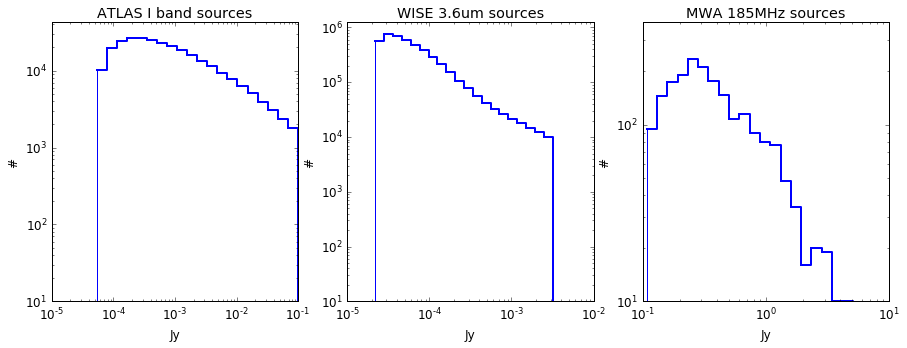

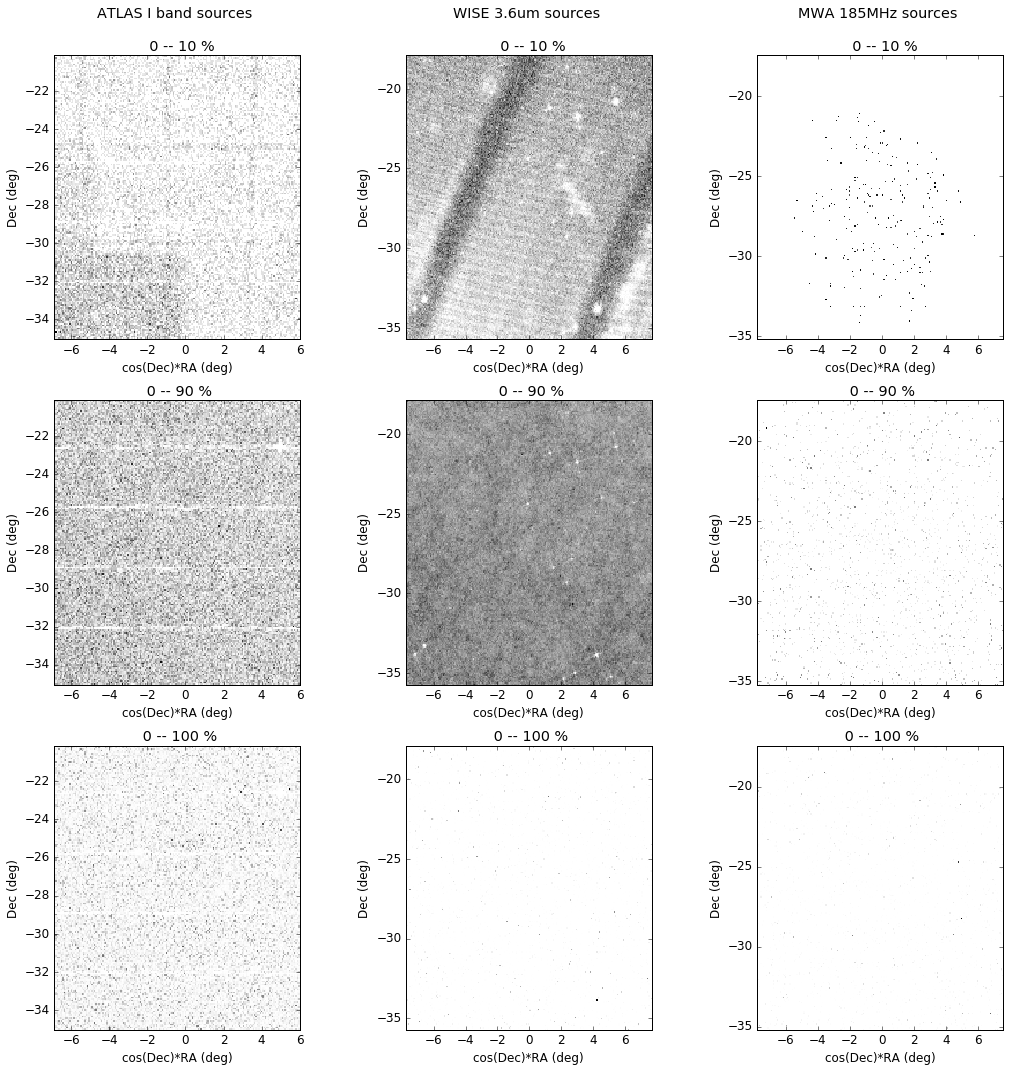

In [125]:
matplotlib.rcParams.update({'font.size': 12})

plt.figure(1,figsize=(15,5))
plt.figure(2,figsize=(15,15))

for cati in range(3):
    plt.figure(1)
    plt.subplot(1,3,cati+1)
    jy1percentile,jy99percentile = np.percentile(cats[cati].jy,1),np.percentile(cats[cati].jy,99)
    cat_utils.logloghist(plt,cats[cati].jy[cats[cati].jy<jy99percentile],jy1percentile,jy99percentile,20,'b')
    plt.title(cat_names[cati])
    plt.xlabel('Jy')
    plt.ylabel('#')
    plt.yscale('log', nonposy='clip')
    
    if cati == 2:
        plt.savefig('ir_hists.pdf',bbox_inches='tight')
    
    plt.figure(2)
    for i in range(len(jy_percentile_cuts_combos)):
        percentile_min,percentile_max = min(np.array(jy_percentile_cuts_combos[i]).flatten()), max(np.array(jy_percentile_cuts_combos[i]).flatten())
        
        if cati==0:
            ir_img = np.sum(np.array([np.load(make_secatwholefield_img_fname(jypercentilecut))['arr_0'] for jypercentilecut in jy_percentile_cuts_combos[i]]),axis=0)
        elif cati==1:
            ir_img = np.sum(np.array([np.load(make_wise_img_fname(0,jypercentilecut))['arr_0'] for jypercentilecut in jy_percentile_cuts_combos[i]]),axis=0)
        elif cati==2:
            ir_jymin,ir_jymax = np.percentile(cats[cati].jy,percentile_min),np.percentile(cats[cati].jy,percentile_max)

            ir_img = cat_utils.cat2img(cats[2],bound_cat=cats[2],dtheta=dtheta_deg,jymin=ir_jymin,jymax=ir_jymax)



        plt.subplot(len(jy_percentile_cuts_combos),len(cats),len(cats)*(i)+1+cati)
        n = ir_img.shape[0]
        plt.imshow(np.swapaxes(ir_img,0,1),interpolation='nearest',cmap='gray_r',rasterized=True,extent=[(-dtheta_deg*n/2+np.mean(cats[cati].ra))*np.cos(-30*np.pi/180.),\
                                                                                                       (dtheta_deg*n/2+np.mean(cats[cati].ra))*np.cos(-30*np.pi/180.),\
                                                                                                       -dtheta_deg*n/2+np.mean(cats[cati].dec),\
                                                                                                       dtheta_deg*n/2+np.mean(cats[cati].dec)])
        s=''
        if i == 0: s = cat_names[cati]+' \n\n '
        
        plt.title('%s %d -- %d %%'%(s,percentile_min,percentile_max))
        plt.xlabel('cos(Dec)*RA (deg)')
        plt.ylabel('Dec (deg)')

plt.tight_layout()
plt.savefig('ir_images.pdf',bbox_inches='tight')

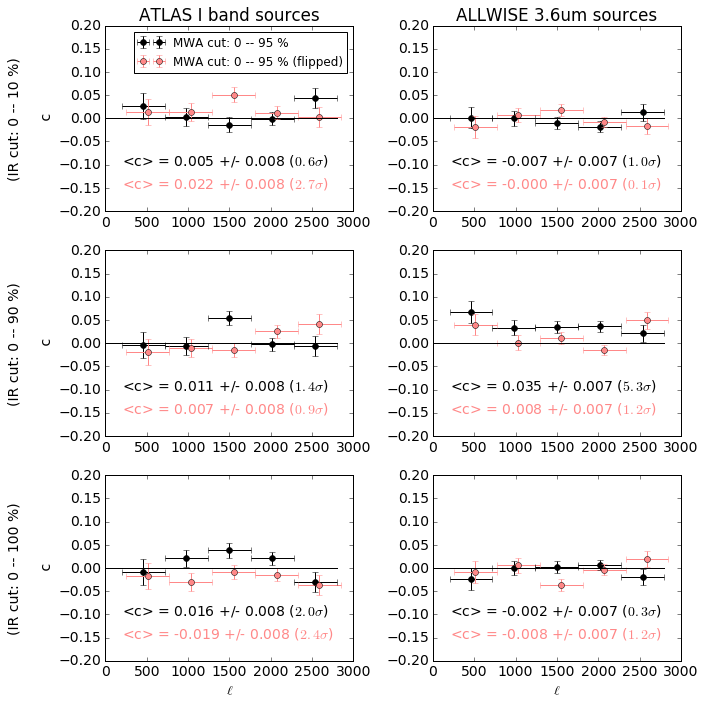

In [129]:
plt.figure(figsize=(10,10))
matplotlib.rcParams.update({'font.size': 14})

mwa_percentile_limits = [95]
cols = ['#000000','#ff8888']
nbins = 5
lmin = 200
lmax = 2800

usehann = True

for flipi in range(2):
    for mwa_percentile_limiti in range(len(mwa_percentile_limits)):
        mwa_jymin,mwa_jymax = np.percentile(mwa_cat.jy,0),np.percentile(mwa_cat.jy,mwa_percentile_limits[mwa_percentile_limiti])

        for ircati in range(2):
            for i in range(len(jy_percentile_cuts_combos)):
                percentile_min,percentile_max = min(np.array(jy_percentile_cuts_combos[i]).flatten()), max(np.array(jy_percentile_cuts_combos[i]).flatten())
#                 ir_jymin,ir_jymax = np.percentile(cats[ircati].jy,percentile_min),np.percentile(cats[ircati].jy,percentile_max)
#                 if ircati==0: # sextractor

#                     # average the cross correlation over all fields
#                     pspec1 = np.zeros(nbins)
#                     pspec2 = np.zeros(nbins)
#                     xspec = np.zeros(nbins)
#                     bin_counts = np.zeros(nbins)
#                     num_ir_fields = len(ir_cats)
#                     for fieldi in range(num_ir_fields):
#                         ir_img = cat_utils.cat2img(ir_cats[fieldi],bound_cat=ir_cats[fieldi],dtheta=dtheta_deg,jymin=ir_jymin,jymax=ir_jymax)
#                         mwa_cat_ir0 = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(ir_cats[fieldi])
#                         mwa_img = cat_utils.cat2img(mwa_cat_ir0,bound_cat=ir_cats[fieldi],dtheta=dtheta_deg,jymin=mwa_jymin,jymax=mwa_jymax)

#                         mwa_img = mwa_img if flipi==0 else np.fliplr(np.flipud(mwa_img))
#                         lbins,pspec1_field,pspec2_field,xspec_field,bin_counts_field = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmax,hann=usehann)
#                         pspec1 += pspec1_field/num_ir_fields
#                         pspec2 += pspec2_field/num_ir_fields
#                         xspec += xspec_field/num_ir_fields
#                         bin_counts += bin_counts_field

                if ircati==0: # ATLAS_mwa57639 whole field catalog
                    ir_img = np.sum(np.array([np.load(make_secatwholefield_img_fname(jypercentilecut))['arr_0'] for jypercentilecut in jy_percentile_cuts_combos[i]]),axis=0)
                    mwa_cat_secatfov = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(secat_fov)
                    mwa_img = cat_utils.cat2img(mwa_cat_secatfov,bound_cat=secat_fov,dtheta=dtheta_deg,jymin=mwa_jymin,jymax=mwa_jymax)
                    
                elif ircati==1: # WISE
                    ir_img = np.sum(np.array([np.load(make_wise_img_fname(0,jypercentilecut))['arr_0'] for jypercentilecut in jy_percentile_cuts_combos[i]]),axis=0)
                    mwa_cat_wise = mwa_cat.limit_to_ra_dec_min_max_of_other_cat(wisecats[0])
                    mwa_img = cat_utils.cat2img(mwa_cat_wise,bound_cat=wisecats[0],dtheta=dtheta_deg,jymin=mwa_jymin,jymax=mwa_jymax)
                    
                mwa_img = mwa_img if flipi==0 else np.flipud(np.fliplr(mwa_img))
                lbins,pspec1,pspec2,xspec,bin_counts = cat_utils.calc_xspec(ir_img,mwa_img,dtheta_deg,nbins,lmin,lmax,hann=usehann)

                hann_effective_reduction_in_num_cells = 1
                if usehann: hann_effective_reduction_in_num_cells = 4
                bin_counts_hann_corrected = bin_counts/hann_effective_reduction_in_num_cells

                c = xspec/np.sqrt(pspec1*pspec2)
                dc = np.sqrt(.5*(1+c**2)/bin_counts_hann_corrected)

                cavg = np.sum(c/dc**2)/np.sum(1./dc**2)
                dcavg = np.sum(1./dc**2)**(-.5)

                plt.subplot(len(jy_percentile_cuts_combos),2,2*i+1+ircati)
                #plt.errorbar(lbins+50*mwa_percentile_limiti,c,dc,color=cols[mwa_percentile_limiti],label='MWA cut: 0 -- %d %%'%mwa_percentile_limits[mwa_percentile_limiti])
                flipstr = '' if flipi == 0 else '(flipped)'
                plt.errorbar(lbins+50*flipi,c,yerr=dc,xerr=.5*(lbins[2]-lbins[1]),fmt='o',color=cols[flipi],label='MWA cut: 0 -- %d %% %s'%(mwa_percentile_limits[mwa_percentile_limiti],flipstr))
                plt.plot([0,lmax],[0,0],'k-')
                plt.ylim([-.2,.2])

                plt.text(200,-.1-.05*flipi,u'<c> = %1.3f +/- %1.3f ($%1.1f\sigma$)'%(cavg,dcavg,np.abs(cavg/dcavg)),color=cols[flipi])

                if i == 0 and ircati == 0:
                    plt.title('ATLAS I band sources')
                if i == 0 and ircati == 1:
                    plt.title('ALLWISE 3.6um sources')

                if ircati == 0:
                    plt.ylabel('(IR cut: %d -- %d %%)\n\n c'%(percentile_min,percentile_max))

                if i == 2:
                    plt.xlabel(r'$\ell$')

                if mwa_percentile_limiti == len(mwa_percentile_limits)-1 and i = = 0 and ircati == 0:
                    plt.legend(fontsize=12)

            

plt.tight_layout()
plt.savefig('cor_grid.pdf',bbox_inches='tight')

In [48]:
mwa_cat.limit_to_ra_dec_min_max_of_other_cat(wisecats[0]).jy.shape

(1927,)

In [104]:
secat_fov.jy.shape

(279247,)

In [49]:
np.sum([ir_cats[i].jy.shape for i in range(4)])

160585

In [50]:
wisecats[0].jy.shape

(4643144,)